## 載入函式庫

In [1]:
#載入常使用的工具庫
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 定義問題

In [2]:
#載入sklearn裡的iris資料集
from sklearn.datasets import load_iris

#載入資料集
iris = load_iris()

In [3]:
#觀察資料
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.data.shape)  
print(iris.target.shape)  

(150, 4)
(150,)


In [5]:
# #觀察資料
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df.head(10)

## 數據準備

In [6]:
#定義資料X和標記y
x = iris.data
y = iris.target

In [7]:
#資料標準化
#三步驟，宣告它，fit它，transform它

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_nor=sc.transform(x)

In [8]:
#區分訓練集和測試集
from sklearn.model_selection import train_test_split

#區分訓練集和驗證集的函數
x_train, x_test, y_train, y_test = train_test_split(x_nor, y, test_size=0.2, random_state=32, shuffle=True)

## 建立AI模型

In [9]:
#沒裝的可以裝一下~
#!pip install xgboost

In [10]:
#今天上課的模型們
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [11]:
#宣告
model = LogisticRegression()

In [12]:
#訓練
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
#預測
y_pred = model.predict(x_test)

## 結果評估

In [14]:
#算準確度
from sklearn.metrics import accuracy_score
ACC = accuracy_score(y_test,y_pred)

In [15]:
print("ACC=",ACC)

ACC= 0.9666666666666667


In [16]:
#算混淆矩陣
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,y_pred)
print(cnf)

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


<AxesSubplot:>

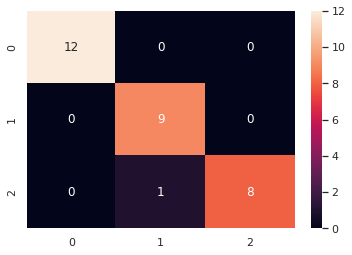

In [17]:
#畫圖作呈現
sns.set()
sns.heatmap(cnf,annot=True)